In [1]:
import warnings
warnings.filterwarnings("ignore")

import datetime as dt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**`CAR PRICE PREDICTION`**

**ID**: A unique identifier for each car entry in the dataset.

**Price**: The monetary value of the car. This is often a key variable for analysis, influencing buyer decisions and market trends.

**Levy**: This could refer to any additional fees or taxes associated with the car's purchase.

**Manufacturer**: The company or brand that produced the car (e.g., Toyota, Ford, BMW).

**Model**: The specific name or designation of the car model (e.g., Camry, Mustang).

**Prod. year**: The year the car was manufactured.

**Category**: This refers to the classification of the car (e.g., sedan, SUV, hatchback).

**Leather interior**: A categorical value indicating whether the car has a leather interior.

**Fuel type**: The type of fuel the car uses (e.g., petrol, diesel, electric).

**Engine volume**: The total displacement volume of the car's engine, usually measured in liters or cubic centimeters (cc).

**Mileage**: The distance the car has traveled, typically measured in kilometers or miles.

**Cylinders**: The number of cylinders in the car's engine.

**Gear box type**: Indicates whether the car has a manual or automatic transmission.

**Drive wheels**: Describes which wheels receive power from the engine (e.g., front-wheel drive, rear-wheel drive, all-wheel drive).

**Doors**: The number of doors on the car, which can influence its classification and usability (e.g., two-door coupe vs. four-door sedan).

**Wheel**: This could refer to the configuration of the car's wheels (e.g., left-hand drive or right-hand drive), which is significant for markets in different regions.

**Color**: The color of the car's exterior.

**Airbags**: Indicates
the presence and number of airbags in the car. This is important for safety features and regulations, impacting consumer choice.


In [2]:
car = pd.read_csv("datasets/car.csv")
car.head(3)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2


In [3]:
car.replace('-', np.nan, inplace=True)

In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              13418 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
car = car.drop(['ID','Doors'], axis =1 )

**Coverting Data Types**

In [6]:
car['Mileage'] = car['Mileage'].str.replace('km','')
car['Engine volume'] = car['Engine volume'].astype(str).apply(lambda x: x.split()[0])

# Coverting Prod. year from object to date time
car['Prod. year'] = pd.to_datetime(car['Prod. year'].astype(int), format='%Y', errors='coerce')

# Converting object to float
cols_convert = ['Price','Engine volume']
car[cols_convert] = car[cols_convert].astype(float)

# Converting object to integer
car['Mileage']= car['Mileage'].astype(float)

# Converting objects to category
category_cols = ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
                 'Gear box type', 'Drive wheels', 'Wheel', 'Color','Cylinders']
car[category_cols] = car[category_cols].astype('category')

**Missing Values**

In [7]:
car.isna().any()

Price               False
Levy                 True
Manufacturer        False
Model               False
Prod. year          False
Category            False
Leather interior    False
Fuel type           False
Engine volume       False
Mileage             False
Cylinders           False
Gear box type       False
Drive wheels        False
Wheel               False
Color               False
Airbags             False
dtype: bool

**Filling missing values**

In [8]:
car['Levy'] = car['Levy'].astype(float)

levy_mean = np.mean(car['Levy'])
car['Levy'].fillna(levy_mean, inplace=True)

**Finding and removing duplicates**

In [9]:
duplicated_values = car[car.duplicated()]

car.drop_duplicates(keep='first', inplace=True)
car = car.reset_index(drop=True)

In [10]:
car.shape

(15725, 16)

**Descriptive and summary statistics**

In [11]:
car.describe()

,Price,Levy,Prod. year,Engine volume,Mileage,Airbags
count,1.572500e+04,15725.000000,15725,15725.000000,1.572500e+04,15725.000000
mean,2.027944e+04,889.343524,2010-07-09 09:30:35.828298752,2.212820,1.836421e+06,6.543339
min,1.000000e+00,87.000000,1939-01-01 00:00:00,0.000000,0.000000e+00,0.000000
25%,7.527000e+03,746.000000,2008-01-01 00:00:00,1.700000,6.657500e+04,4.000000
50%,1.416600e+04,906.838128,2012-01-01 00:00:00,2.000000,1.210000e+05,6.000000
75%,2.336400e+04,906.838128,2014-01-01 00:00:00,2.500000,1.800000e+05,12.000000
max,2.630750e+07,11714.000000,2020-01-01 00:00:00,20.000000,2.147484e+09,16.000000
std,2.106390e+05,366.828369,NaN,0.806187,5.353248e+07,4.067728


In [12]:
car['Cylinders'].unique()

[6.0, 4.0, 8.0, 1.0, 12.0, ..., 5.0, 7.0, 9.0, 10.0, 14.0]
Length: 13
Categories (13, float64): [1.0, 2.0, 3.0, 4.0, ..., 10.0, 12.0, 14.0, 16.0]

**Removing Outliers**

In [13]:
from scipy.stats import iqr

def remove_outliers_all(car):
    selected_columns = car.select_dtypes(include=['int64', 'float64', 'datetime']).drop(columns=['ID'], errors='ignore')

    if selected_columns.empty:
        return car

    for col in selected_columns.columns:
        if col != 'price':  # Exclude the 'price' column
            IQR = iqr(car[col])
            lower = np.quantile(car[col], 0.25) - 1.5 * IQR
            higher = np.quantile(car[col], 0.75) + 1.5 * IQR
            car = car[(car[col] >= lower) & (car[col] <= higher)]

    return car

# Call the function to remove outliers
car = remove_outliers_all(car)

Text(0.5, 1.0, 'Correlation Heatmap Between Numerical Features')

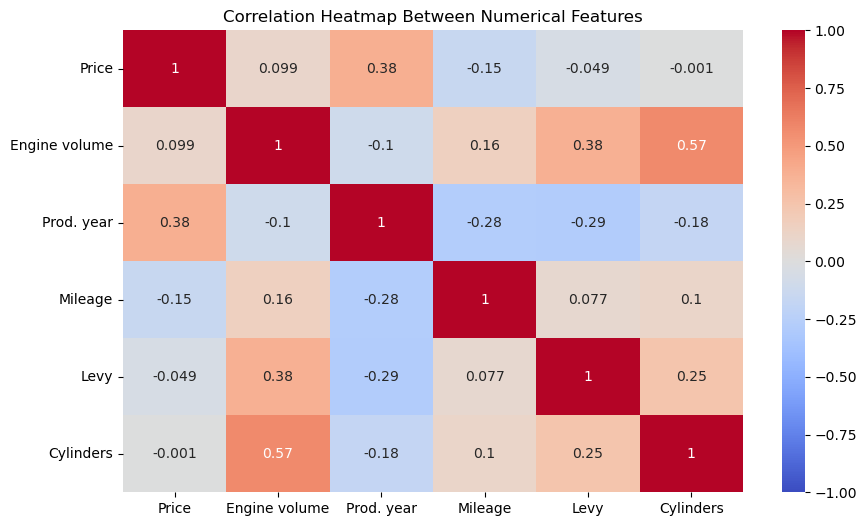

In [14]:
numerical_cols = ['Price', 'Engine volume','Prod. year' ,'Mileage', 'Levy','Cylinders']
car_corr = car[numerical_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(car_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap Between Numerical Features')

This is the correlation of the Price variable with itself, which is always 1. This suggests that Price is perfectly correlated with Price.

This suggests that changes in Engine volume, Cylinders and Levy have little to no effect on Price but a positive correlation.

In [15]:
price_correlation = car_corr['Price'].sort_values(ascending=False)
print(price_correlation)

Price            1.000000
Prod. year       0.384418
Engine volume    0.098984
Cylinders       -0.001030
Levy            -0.049205
Mileage         -0.150592
Name: Price, dtype: float64


In [16]:
car["Price"].describe()

count    11649.000000
mean     15901.956992
std      10992.541458
min          1.000000
25%       7840.000000
50%      14426.000000
75%      21768.000000
max      47107.000000
Name: Price, dtype: float64

Text(0.5, 0, 'Price')

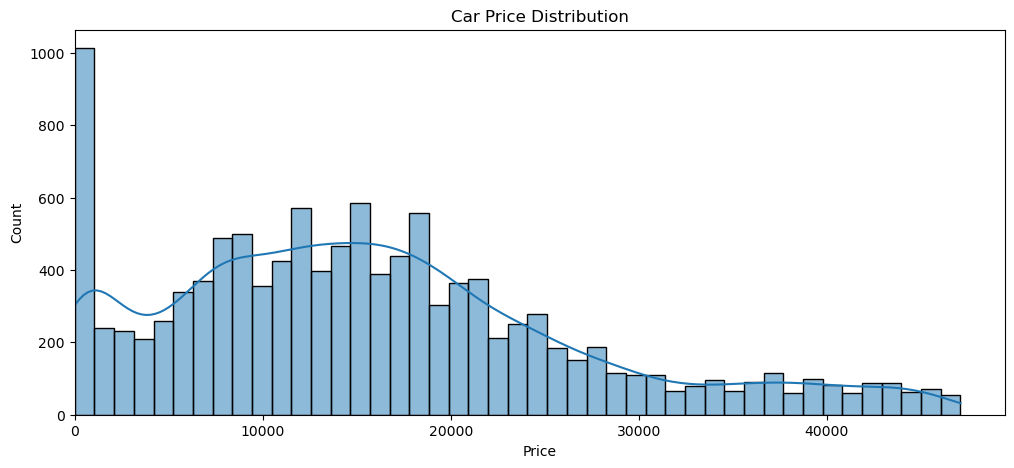

In [17]:
plt.figure(figsize=(12,5))
sns.histplot(data= car["Price"],bins=45, kde=True)
plt.ylim(0)
plt.xlim(0)
plt.title("Car Price Distribution")
plt.xlabel("Price")

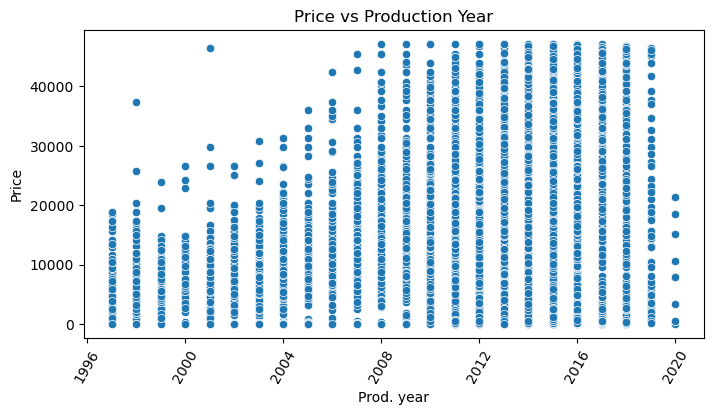

In [18]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="Prod. year",y="Price",data=car)
plt.xticks(rotation=60)
plt.title("Price vs Production Year")
plt.show()

In [19]:
mean_price_per_year = car.groupby('Prod. year')['Price'].mean().reset_index()
mean_price_per_year

,Prod. year,Price
0,1997-01-01,6378.484615
1,1998-01-01,7217.094444
2,1999-01-01,7234.678161
3,2000-01-01,8067.437768
4,2001-01-01,8295.504762
5,2002-01-01,8739.669355
6,2003-01-01,8729.340278
7,2004-01-01,10291.522059
8,2005-01-01,9735.659091
9,2006-01-01,11948.243802


Text(0, 0.5, 'Mean Price')

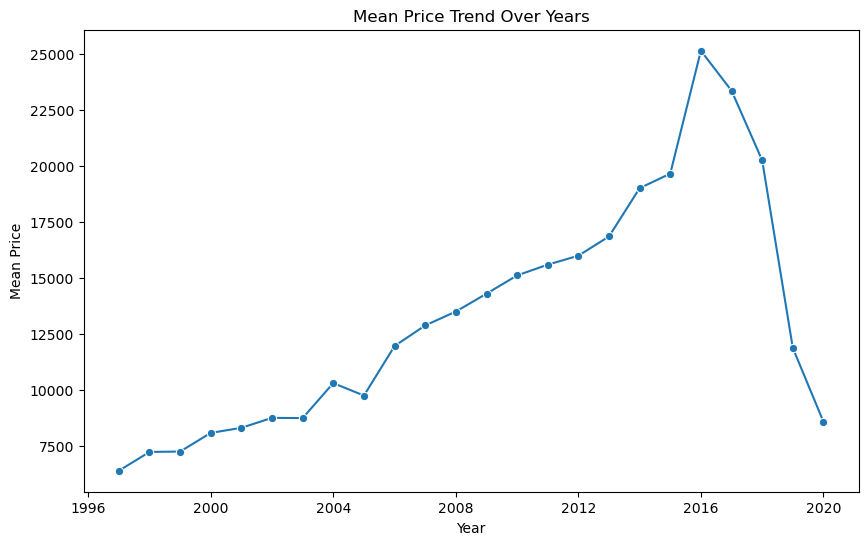

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Prod. year', y='Price', data=mean_price_per_year, marker='o')
plt.title('Mean Price Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Price')

[Text(0.5, 0, 'Engine Volume'),
 Text(0, 0.5, 'Mileage in km(Distance travelled)'),
 Text(0.5, 1.0, 'Mileage per Engine Volume Correlation')]

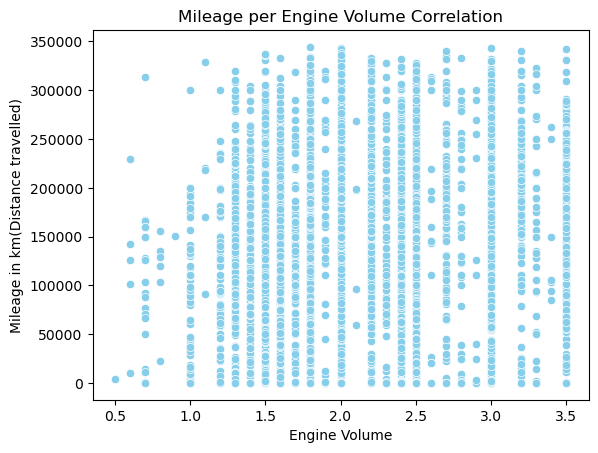

In [21]:
g = sns.scatterplot(y='Mileage', x='Engine volume', data=car , color='skyblue',)
g.set(xlabel='Engine Volume', ylabel='Mileage in km(Distance travelled)', title='Mileage per Engine Volume Correlation')

In [22]:
# for cat in car.select_dtypes(include='object').columns:
#     car = car.groupby(cat).apply(remove_outliers_all).reset_index(drop=True)

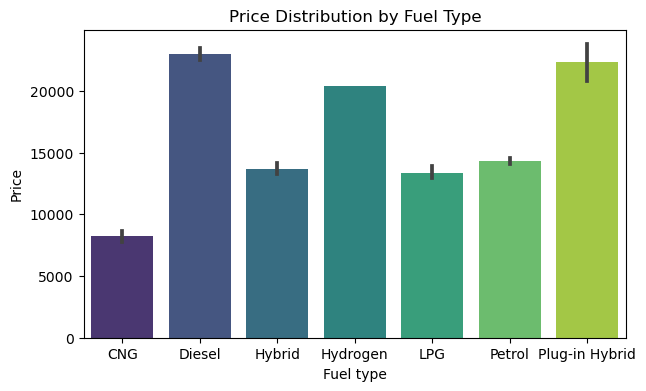

In [23]:
plt.figure(figsize=(7, 4))
sns.barplot(x="Fuel type", y="Price", data=car, palette='viridis')
plt.title("Price Distribution by Fuel Type")
plt.show()

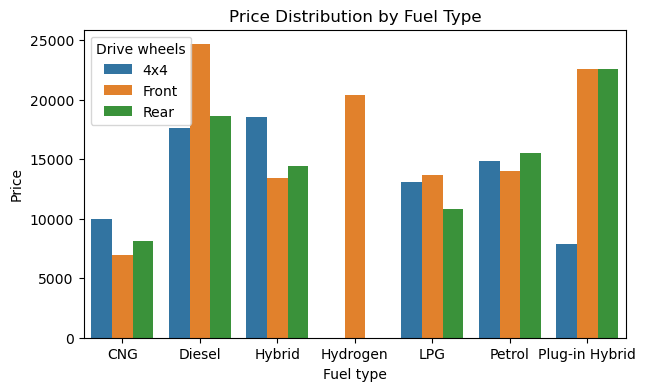

In [24]:
plt.figure(figsize=(7, 4))
sns.barplot(x="Fuel type", y="Price", data=car, ci = None, hue='Drive wheels')
plt.title("Price Distribution by Fuel Type")
plt.show()

In [25]:
# for cat in car.select_dtypes(include='object').columns:
#     car = car.groupby(cat).apply(remove_outliers_all).reset_index(drop=True)

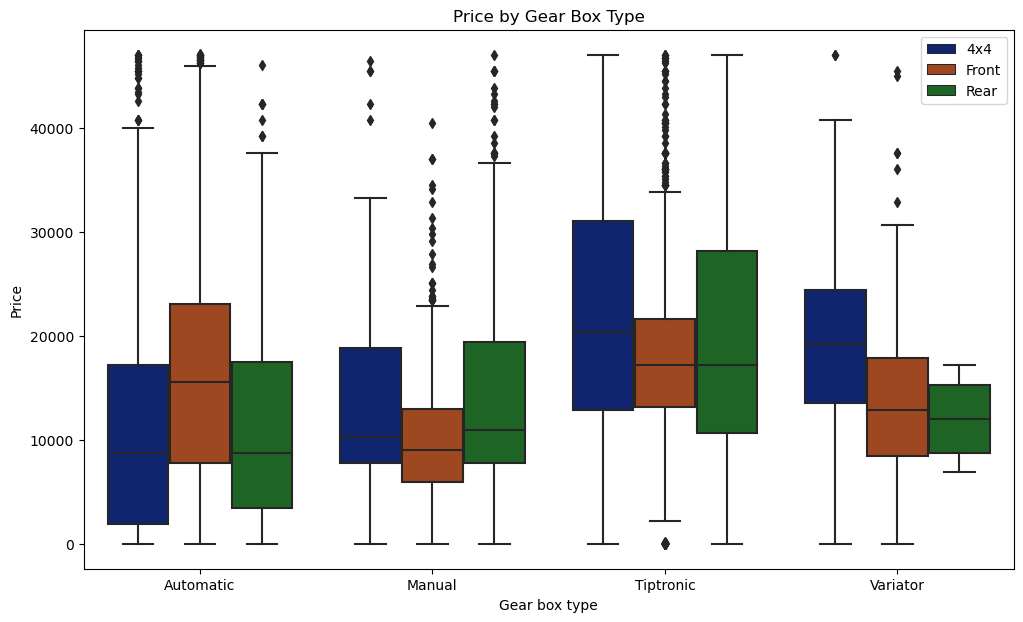

In [26]:
plt.figure(figsize=(12, 7))
sns.boxplot(x="Gear box type", y="Price", data=car, hue="Drive wheels", palette='dark')
plt.title("Price by Gear Box Type")
plt.legend()
plt.show()

In [27]:
top_manufacturers = car['Manufacturer'].value_counts().nlargest(10)
top_manufacturers

Manufacturer
HYUNDAI          2414
TOYOTA           2151
MERCEDES-BENZ     896
CHEVROLET         789
FORD              660
HONDA             660
BMW               609
NISSAN            509
VOLKSWAGEN        476
SSANGYONG         378
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'HYUNDAI'),
  Text(1, 0, 'TOYOTA'),
  Text(2, 0, 'MERCEDES-BENZ'),
  Text(3, 0, 'CHEVROLET'),
  Text(4, 0, 'FORD'),
  Text(5, 0, 'HONDA'),
  Text(6, 0, 'BMW'),
  Text(7, 0, 'NISSAN'),
  Text(8, 0, 'VOLKSWAGEN'),
  Text(9, 0, 'SSANGYONG')])

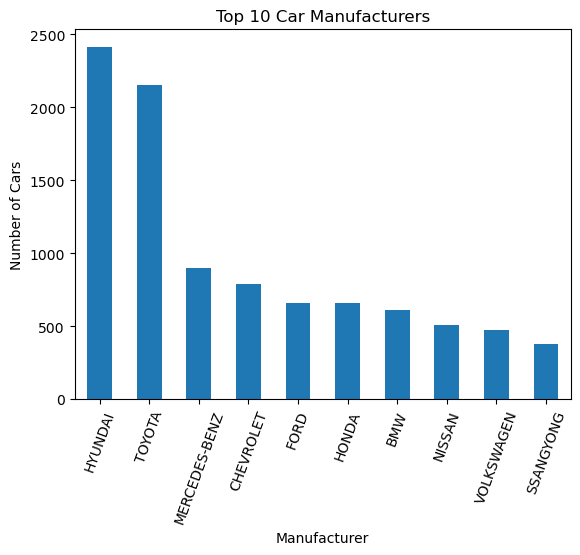

In [28]:
top_manufacturers.plot(kind='bar')
plt.title('Top 10 Car Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Cars')
plt.xticks(rotation=70)

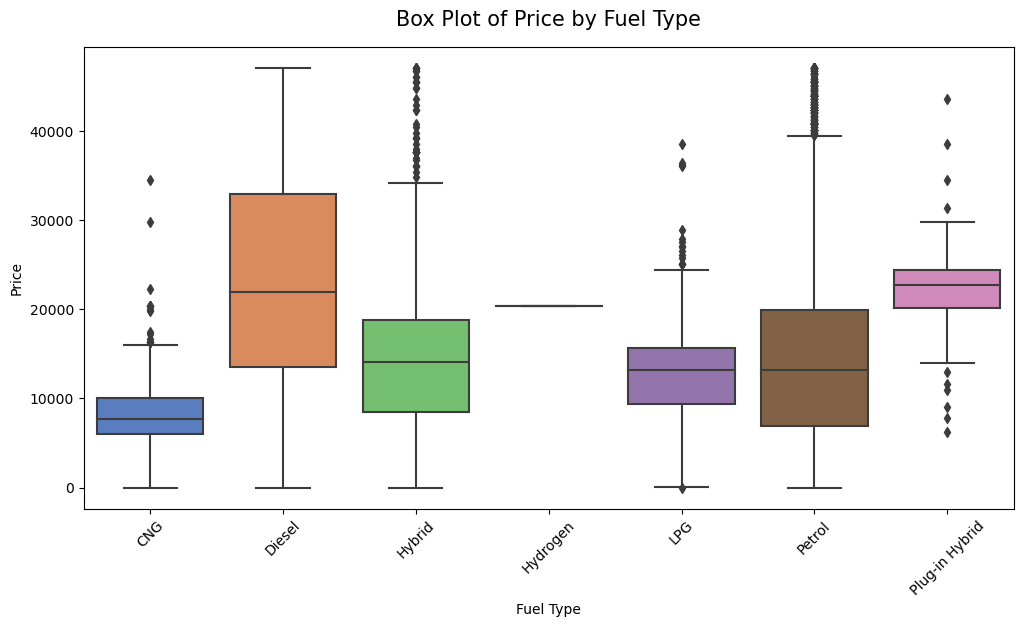

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=car, x='Fuel type', y='Price', palette='muted')
plt.title('Box Plot of Price by Fuel Type', fontsize=15, pad=15)
plt.xticks(rotation=45)
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()


# **`3. Data Manipulation and Analysis:`**

In [30]:

average_price_by_manufacturer = car.groupby('Manufacturer')['Price'].mean().reset_index()
average_price_by_manufacturer.columns = ['Manufacturer', 'Average Price']
print(average_price_by_manufacturer)

    Manufacturer  Average Price
0          ACURA    6882.625000
1     ALFA ROMEO    9890.250000
2   ASTON MARTIN            NaN
3           AUDI   14448.666667
4        BENTLEY            NaN
..           ...            ...
60           VAZ    6438.363636
61    VOLKSWAGEN   12593.418067
62         VOLVO   11308.230769
63           ZAZ            NaN
64          სხვა   17248.500000

[65 rows x 2 columns]


In [31]:
count_by_fuel_type = car.groupby('Fuel type').size().reset_index(name='Count')
print(count_by_fuel_type)

        Fuel type  Count
0             CNG    308
1          Diesel   2428
2          Hybrid   1673
3        Hydrogen      1
4             LPG    450
5          Petrol   6723
6  Plug-in Hybrid     66


In [32]:
total_mileage_by_category = car.groupby('Category')['Mileage'].sum().reset_index()
total_mileage_by_category.columns = ['Category', 'Total Mileage']
print(total_mileage_by_category)


       Category  Total Mileage
0     Cabriolet      2018554.0
1         Coupe     40491918.0
2   Goods wagon     27364921.0
3     Hatchback    257281704.0
4          Jeep    356300712.0
5     Limousine       180800.0
6      Microbus     28436513.0
7       Minivan     59743096.0
8        Pickup      3763315.0
9         Sedan    672665277.0
10    Universal     32426507.0


In [33]:
average_price_by_manufacturer = car.groupby('Manufacturer')['Price'].mean().reset_index()
average_price_by_manufacturer.columns = ['Manufacturer', 'Average Price']

car_merged = car.merge(average_price_by_manufacturer, on='Manufacturer', how='left')
print(car_merged[['Manufacturer', 'Price', 'Average Price']].head())

  Manufacturer    Price  Average Price
0    CHEVROLET  16621.0   15500.039290
1        HONDA   8467.0   12055.633333
2         FORD   3607.0   14625.854545
3      HYUNDAI  39493.0   20502.918807
4       TOYOTA   1803.0   15059.697815


In [34]:
yearly_stats = car.groupby('Prod. year').agg(
    Average_Price=('Price', 'mean'),
    Car_Count=('Price', 'size')
).reset_index()

print(yearly_stats)

   Prod. year  Average_Price  Car_Count
0  1997-01-01    6378.484615        130
1  1998-01-01    7217.094444        180
2  1999-01-01    7234.678161        174
3  2000-01-01    8067.437768        233
4  2001-01-01    8295.504762        210
5  2002-01-01    8739.669355        248
6  2003-01-01    8729.340278        288
7  2004-01-01   10291.522059        272
8  2005-01-01    9735.659091        308
9  2006-01-01   11948.243802        242
10 2007-01-01   12868.257053        319
11 2008-01-01   13486.892768        401
12 2009-01-01   14286.717514        354
13 2010-01-01   15101.687356        870
14 2011-01-01   15582.718310       1065
15 2012-01-01   15981.677263       1447
16 2013-01-01   16843.968931       1384
17 2014-01-01   19000.161607       1120
18 2015-01-01   19649.811821        829
19 2016-01-01   25139.158857        875
20 2017-01-01   23351.942446        417
21 2018-01-01   20240.932584        178
22 2019-01-01   11861.926316         95
23 2020-01-01    8568.700000         10


In [35]:
car['Year'] = car['Prod. year'].dt.year

In [36]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
columns_to_encode = car.select_dtypes(include='category')
for col in columns_to_encode:
    car[col] = label_encoder.fit_transform(car[col])


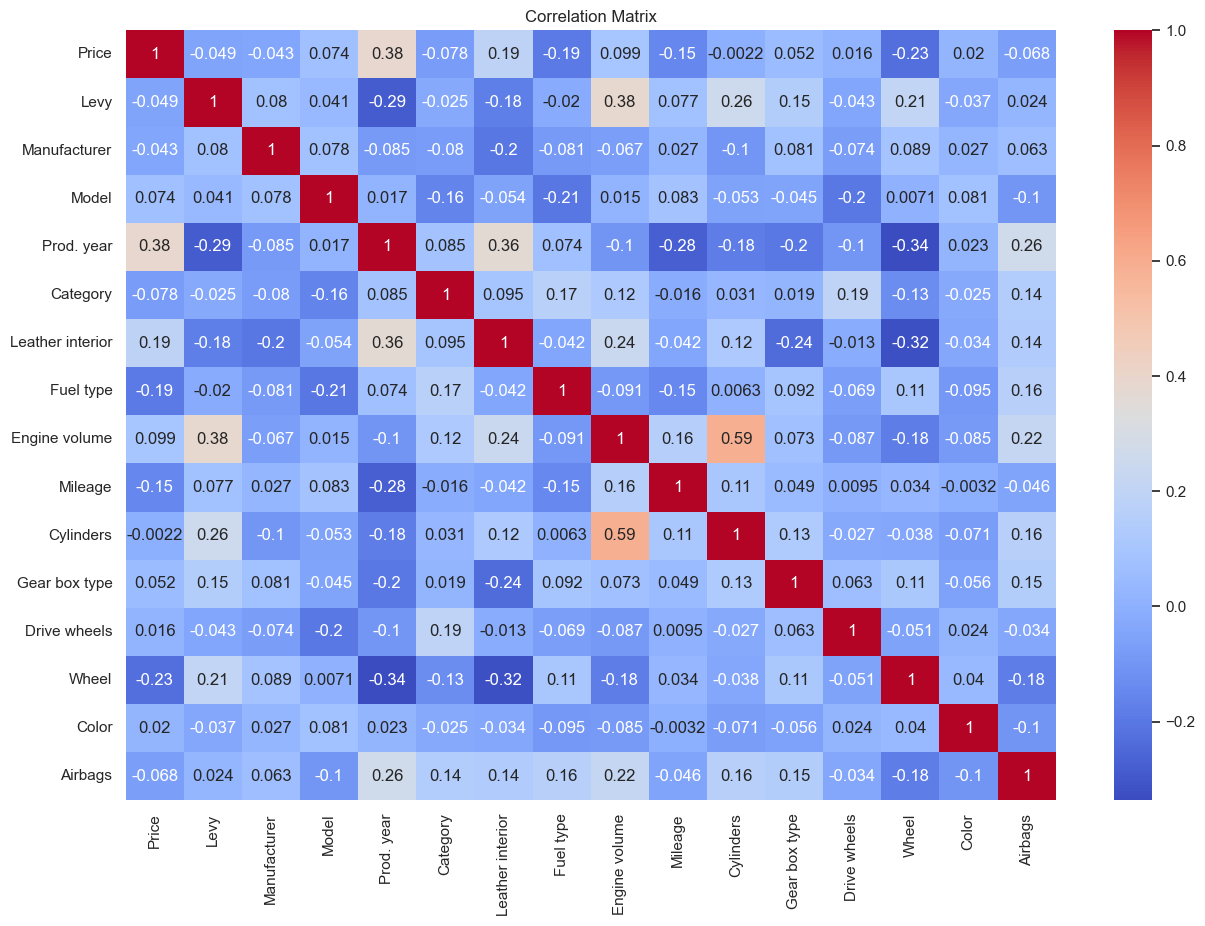

Strongly correlated features with Price:
Price    1.0
Name: Price, dtype: float64


In [37]:
sns.set(context = 'notebook')
numeric_car = car.select_dtypes(include=['float64', 'int64','datetime'])
correlation_matrix = numeric_car.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

target_correlation = correlation_matrix['Price']
strong_correlations = target_correlation[(target_correlation > 0.7) | (target_correlation < -0.7)]
print("Strongly correlated features with Price:")
print(strong_correlations)

# **`4. Visualization Enhancement:`**

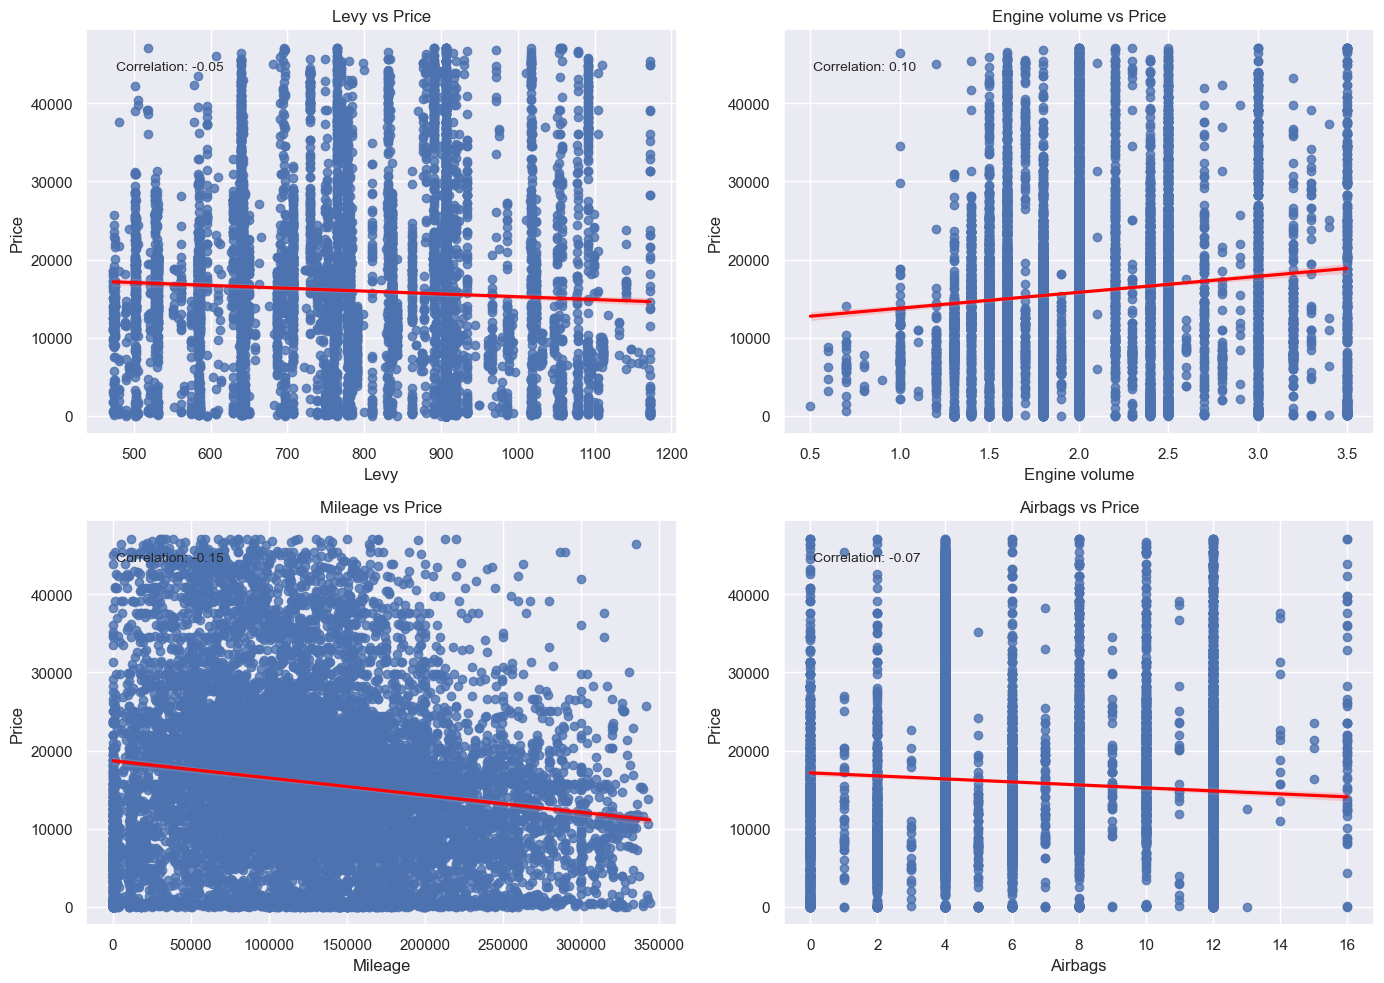

In [38]:
features = ['Levy', 'Engine volume', 'Mileage', 'Airbags']
plt.figure(figsize=(14, 10))

for i, feature in enumerate(features, 1):
  plt.subplot(2, 2, i)
  sns.regplot(data=car, x=feature, y='Price', line_kws={"color": "red"})
  correlation = car[['Price', feature]].corr().iloc[0, 1]
  plt.text(0.05, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=10)
  plt.title(f'{feature} vs Price')

plt.tight_layout()

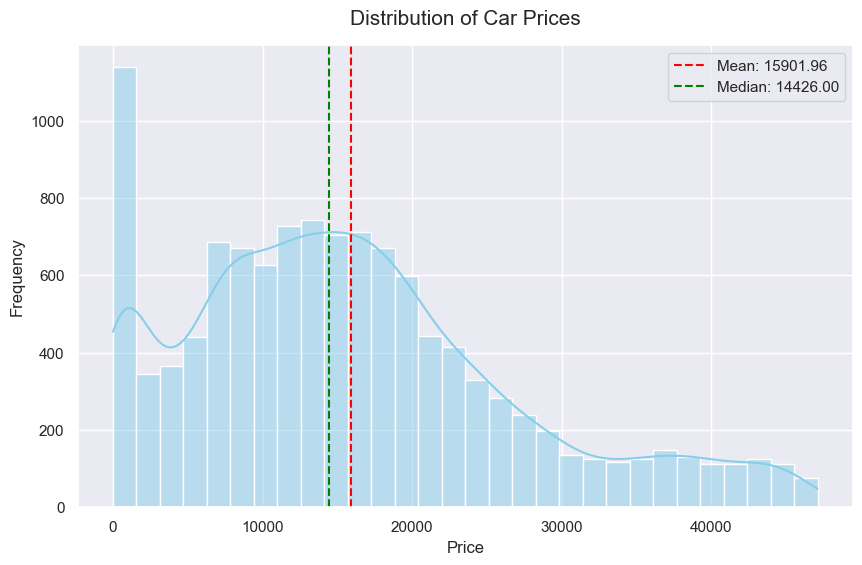

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(car['Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Car Prices', fontsize=15, pad=15)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.axvline(car['Price'].mean(), color='red', linestyle='--', label=f'Mean: {car["Price"].mean():.2f}')
plt.axvline(car['Price'].median(), color='green', linestyle='--', label=f'Median: {car["Price"].median():.2f}')
plt.legend()

Violin plot, which combines elements of box plots and KDE (Kernel Density Estimate) plots to show the distribution of price for each category in Manufacturer

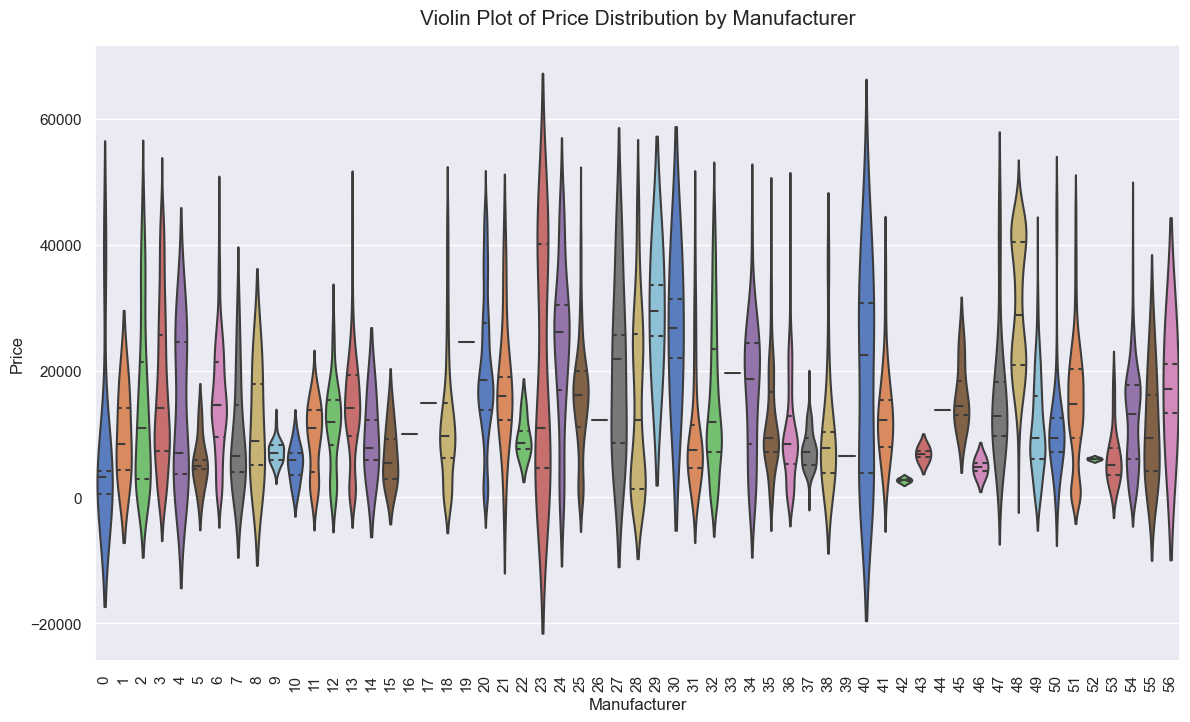

In [40]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=car, x='Manufacturer', y='Price', inner='quartile', scale='width', palette="muted")
plt.xticks(rotation=90)
plt.title('Violin Plot of Price Distribution by Manufacturer', fontsize=15, pad=15)
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.show()


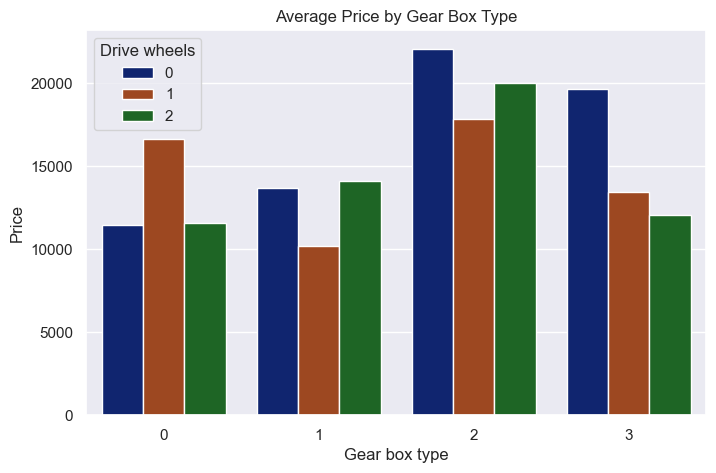

In [41]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Gear box type", y="Price", data=car, hue="Drive wheels", ci=None, palette='dark')
plt.title("Average Price by Gear Box Type")
plt.show()

# **`5. Predictive Modeling:`**

In [42]:
# Feature Engineering
car['Year'] = car['Prod. year'].dt.year
car['Car Age'] = pd.Timestamp.now().year - car['Year']

In [43]:
car['Car Age'].value_counts()

Car Age
13    1447
12    1384
11    1120
14    1065
9      875
15     870
10     829
8      417
17     401
16     354
18     319
20     308
22     288
21     272
23     248
19     242
25     233
24     210
27     180
7      178
26     174
28     130
6       95
5       10
Name: count, dtype: int64

In [44]:
car['Car Age'].describe()

count    11649.000000
mean        14.395055
std          4.999502
min          5.000000
25%         11.000000
50%         13.000000
75%         17.000000
max         28.000000
Name: Car Age, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
numerical_columns = car.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
car[numerical_columns] = scaler.fit_transform(car[numerical_columns])

In [47]:
X = car.drop(columns=['Prod. year', 'Price'], axis=1)
y = car["Price"]

**Splitting the data set into training and testing**

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Regression Model

In [63]:
def train_and_evaluate_model(model, X, y, test_size=0.3, random_state=42, alpha=None):
    # alpha: Regularization strength (only for models like Ridge, Lasso)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # If alpha is provided and model is Ridge or Lasso, apply it
    if alpha is not None and isinstance(model, Ridge):
        model = Ridge(alpha=alpha)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'R² Score: {r2:.2f}')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

    residuals = y_test - y_pred

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title('Predicted vs Actual Prices')
    plt.grid(True)

R² Score: 0.32
Mean Squared Error (MSE): 0.71
Root Mean Squared Error (RMSE): 0.84


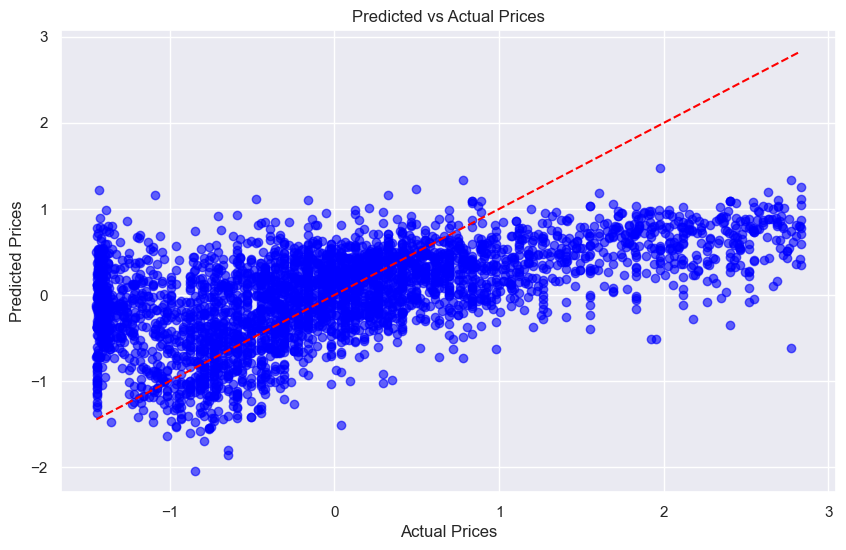

In [65]:
model = Ridge(alpha= 1)
train_and_evaluate_model(model, X, y)

R² Score: 0.70
Mean Squared Error (MSE): 0.32
Root Mean Squared Error (RMSE): 0.56


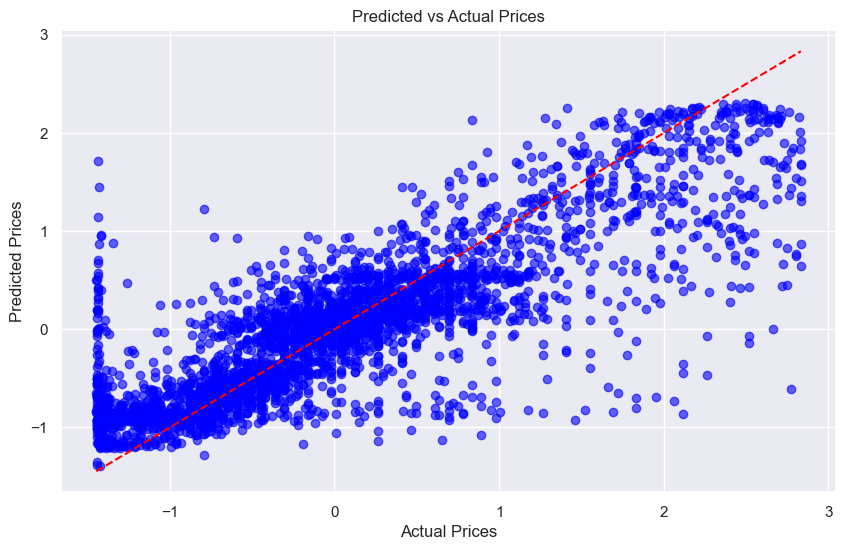

In [66]:
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
train_and_evaluate_model(model, X, y)